In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

### 1. Data Collection & Understanding

#### 1.1 Load the dataset using Pandas.
 To read csv file we are using `pd.read_csv("File_Name")` method


In [314]:
df = pd.read_csv('TitanicDataset.csv')

#### 1.2 Display the first few rows (df.head()).

We Can use`head()` method is used for displaying top 5 rows from Data Frame

and `head(N)` If we pass any Arguments 'N' on it the it will Displaying 'N' rows from the Data Frame

Similarly, 

We Can use `tail()` method is used for displaying bottom 5 rows from Data Frame

and `tail(N)` method is used for displaying Bottom N rows from Data Frame

In [315]:
print(df.head())
print(df.tail())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
     PassengerId  Survived  Pclass                          Name     Sex  \
413       

#### 1.3 Check the data types and column information (df.info()).

`info()` method is used for print information about Data Frame

In [316]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


#### 1.4 Get summary statistics (df.describe())

`discribe()` method is used for getting a statistical summary which includes
1. Count: It counts the number of Non-Null cells
2. std: It gives the standard deviation of each column
3. Meam: It will finds the means of each Column
4. min: It will finds the minimum value from the Data Frame
5. 25% , 50% , 75%: It gives (25% , 50% , 75%)th term from Data Frame
6. max: It will finds the maximum value from the Data Frame


In [317]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


#### 1.5 Identify missing values (df.isnull().sum())
To identifying Missing values here we use 2 methods
`.isnull()` method which return True if there is NaN or NULL and False if there is any value on it,

`.isnull().sum()` method which return the number of False on the Data Frame

In [318]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### 1.6 Understand unique values in categorical columns (df['column_name'].unique()).

The `.unique()` method is use to find all the Unique Elements from the any column of the datasets

In [319]:
print(df['Age'].unique())

[34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   24.   35.   45.   55.    9.   48.   50.   22.5  41.   33.
 18.5  25.   39.   60.   36.   20.   28.   10.   17.   32.   13.   31.
 29.   28.5  32.5   6.   67.   49.    2.   76.   43.   16.    1.   12.
 42.   53.   26.5  40.   61.   60.5   7.   15.   54.   64.   37.   34.
 11.5   8.    0.33 38.   57.   40.5   0.92 19.   36.5   0.75  0.83 58.
  0.17 59.   14.5  44.    5.   51.    3.   38.5 ]


### 2. Handling Missing Values

In [272]:
df = pd.read_csv('TitanicDataset.csv')

#### 2.1 Fill missing values in Age using median or mean

To Fill the Missing Values we use `.fillna()`
To Fill the Mean on it we will use `.fillna({'age': df['age'].mean()},inplace=True)`
To Fill the Median on it we will use `.fillna({'age': df['age'].median()},inplace=True)`

In [164]:
ageMean = df['Age'].mean()
ageMean
df.fillna({'Age':ageMean},inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


#### 2.2 Fill missing values in Embarked with the most frequent value

For This task we can replace the NaN with mode of Embarked, we use `df.fillna({'Embarked': df['Embarked'].mode()},inplace=True)`

In [165]:
df.fillna({'Embarked': df['Embarked'].mode()},inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


#### 2.3 Drop Cabin column (if too many missing values) or create a new feature like "Cabin Available" (1/0).

In [166]:
df['Cabin Available'] = df['Cabin'].notna().astype(int)
df.drop(columns='Cabin',inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin Available
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,0


### 3. Data Cleaning & Preprocessing

In [ ]:
df = pd.read_csv('TitanicDataset.csv')

#### 3.1 Convert categorical variables (Sex, Embarked) into numerical values (Label Encoding / One-Hot Encoding).

For Transforming we use function in `sklearn.preprocessing`, `LabelEncoder()`

`labelEncoder.fit_transform(df['Sex'])`will convert Male into '1' and Female into '0'


In [167]:
labelEncoder = LabelEncoder()
df['Sex'] = labelEncoder.fit_transform(df['Sex'])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin Available
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,Q,0
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,S,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,S,0


#### 3.2 Normalize/Standardize numerical variables (if necessary)

In [168]:
scaler = StandardScaler()
col= ['Sex','Survived']
df[col] = scaler.fit_transform(df[col])

scaler = MinMaxScaler()
df[col] = scaler.fit_transform(df[col])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin Available
0,892,0.0,3,"Kelly, Mr. James",1.0,34.50000,0,0,330911,7.8292,Q,0
1,893,1.0,3,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.00000,1,0,363272,7.0000,S,0
2,894,0.0,2,"Myles, Mr. Thomas Francis",1.0,62.00000,0,0,240276,9.6875,Q,0
3,895,0.0,3,"Wirz, Mr. Albert",1.0,27.00000,0,0,315154,8.6625,S,0
4,896,1.0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.00000,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.0,3,"Spector, Mr. Woolf",1.0,30.27259,0,0,A.5. 3236,8.0500,S,0
414,1306,1.0,1,"Oliva y Ocana, Dona. Fermina",0.0,39.00000,0,0,PC 17758,108.9000,C,1
415,1307,0.0,3,"Saether, Mr. Simon Sivertsen",1.0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,0.0,3,"Ware, Mr. Frederick",1.0,30.27259,0,0,359309,8.0500,S,0


#### 3.3 Remove duplicate or unnecessary columns (PassengerId, Ticket, etc.).


In [169]:
df.drop_duplicates(inplace=True)
df.drop(columns=['PassengerId','Ticket', 'Name'],inplace=True)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin Available
0,0.0,3,1.0,34.50000,0,0,7.8292,Q,0
1,1.0,3,0.0,47.00000,1,0,7.0000,S,0
2,0.0,2,1.0,62.00000,0,0,9.6875,Q,0
3,0.0,3,1.0,27.00000,0,0,8.6625,S,0
4,1.0,3,0.0,22.00000,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...,...
413,0.0,3,1.0,30.27259,0,0,8.0500,S,0
414,1.0,1,0.0,39.00000,0,0,108.9000,C,1
415,0.0,3,1.0,38.50000,0,0,7.2500,S,0
416,0.0,3,1.0,30.27259,0,0,8.0500,S,0


### 4. Exploratory Data Analysis (EDA)

In [273]:
df = pd.read_csv('TitanicDataset.csv')

#### 4.1 Univariate Analysis (Individual Feature Analysis)

#### 4.1.1 Plot distributions of numerical variables (Age, Fare) using histograms/KDE plots

<Axes: xlabel='Age', ylabel='Count'>

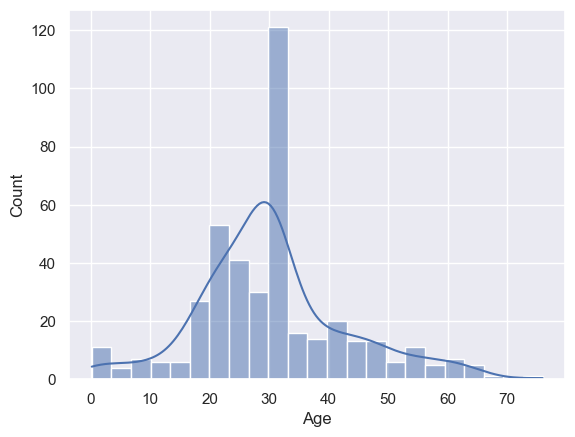

In [205]:
sns.histplot(df['Age'],kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

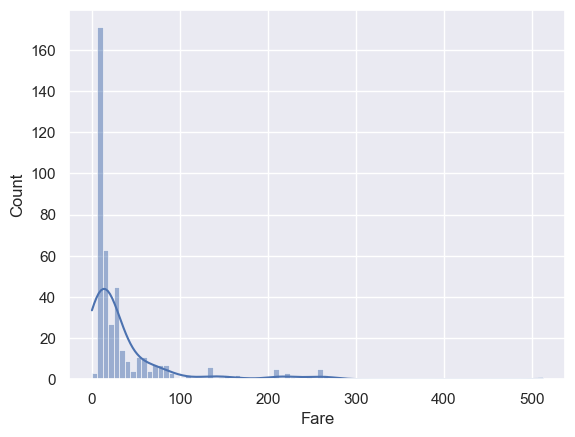

In [193]:
sns.histplot(df['Fare'],kde= True)

<Axes: xlabel='Fare', ylabel='Count'>

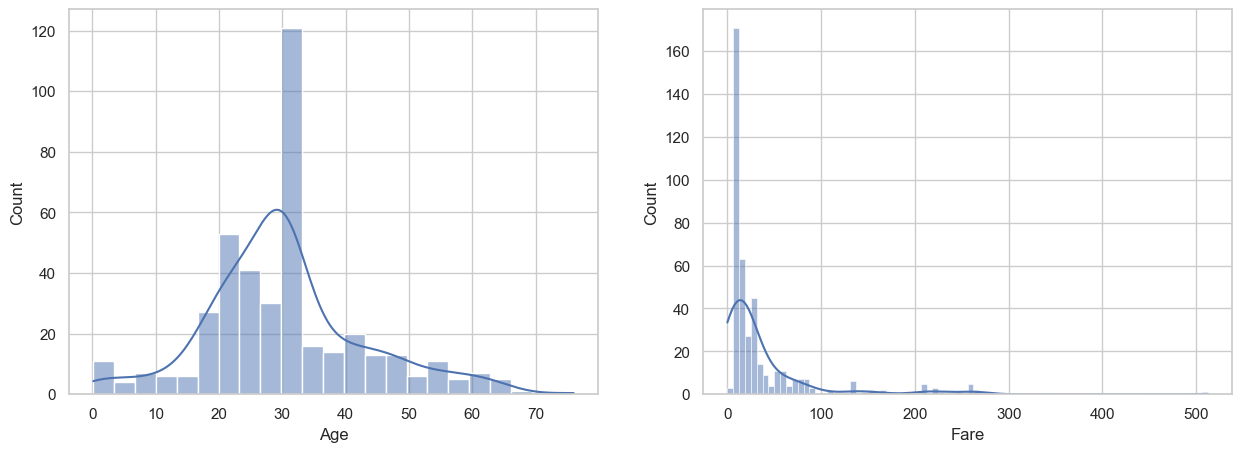

In [230]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

sns.histplot(df['Age'],kde=True, ax= axes[0])
sns.histplot(df['Fare'],kde= True, ax= axes[1])

#### 4.1.2 Analyze categorical variables (Sex, Pclass, Embarked) using countplots

<Axes: xlabel='Sex', ylabel='count'>

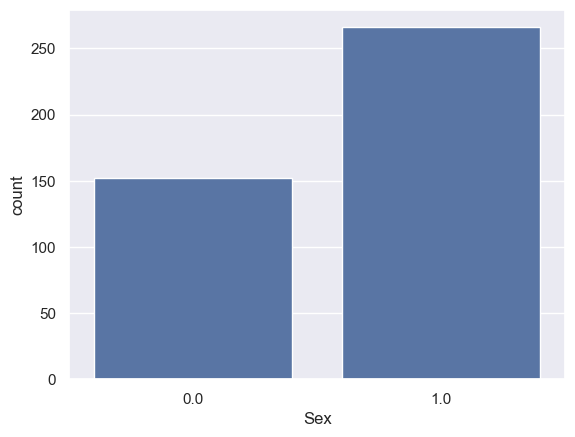

In [210]:
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

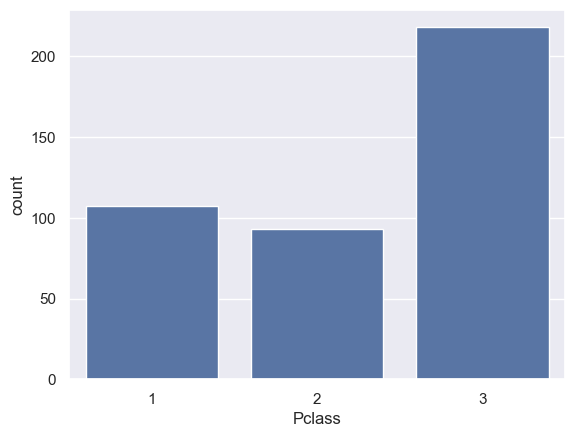

In [211]:
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Embarked', ylabel='count'>

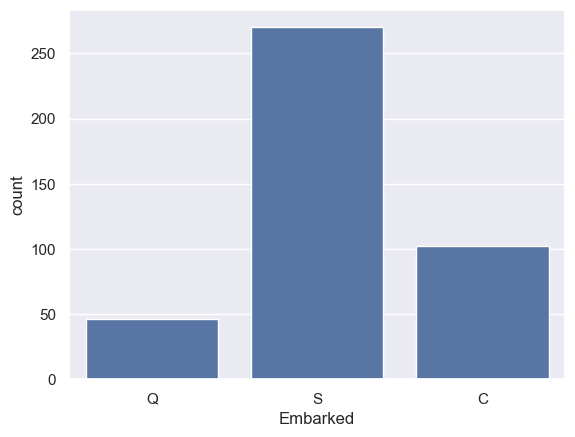

In [212]:
sns.countplot(x='Embarked', data=df)

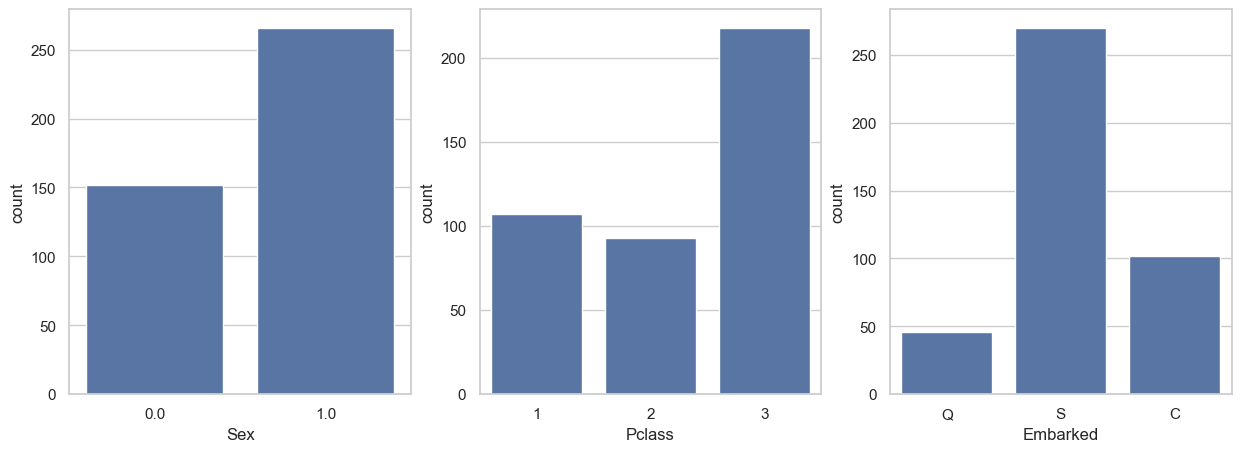

In [232]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x=df["Sex"], ax=axes[0])

sns.countplot(x=df["Pclass"], ax=axes[1])

sns.countplot(x=df["Embarked"], ax=axes[2])

plt.show()


#### 4.2 Bivariate Analysis (Comparison of Two Variables)

#### 4.2.1 Compare Survival vs Gender (sns.barplot(x='Sex', y='Survived', data=df)).

<Axes: xlabel='Sex', ylabel='Survived'>

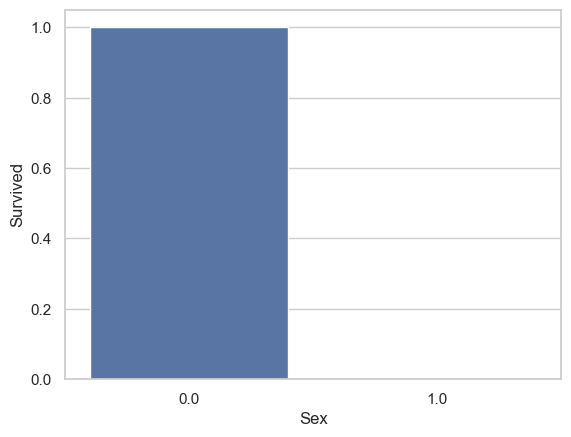

In [ ]:
sns.barplot(x='Sex',y='Survived',data=df)

#### 4.2.2 Compare Survival vs Passenger Class (sns.barplot(x='Pclass', y='Survived', data=df)).

<Axes: xlabel='Pclass', ylabel='Survived'>

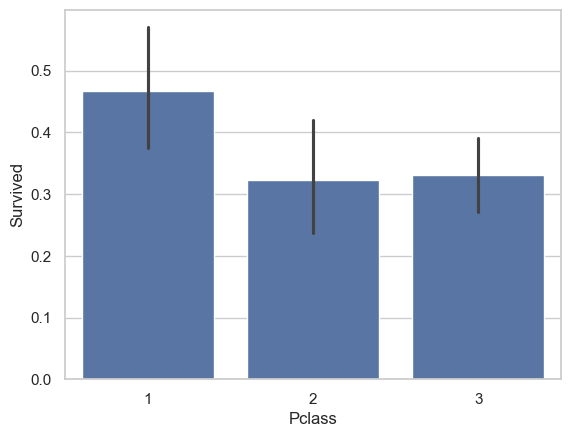

In [238]:
sns.barplot(x='Pclass',y='Survived',data=df)

#### 4.2.3 Boxplot of Fare distribution across Passenger Classes.

<Axes: xlabel='Pclass', ylabel='Fare'>

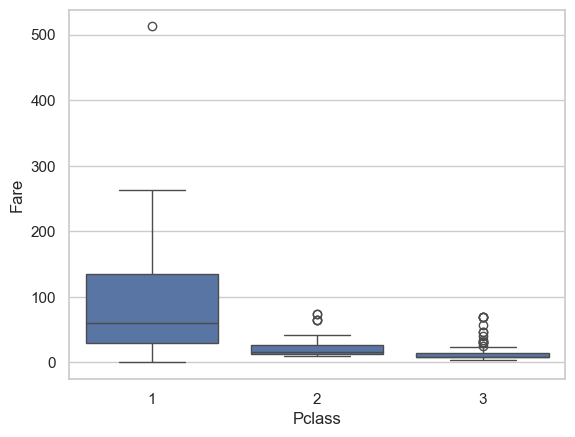

In [243]:
sns.boxplot(x='Pclass',y='Fare',data=df)

#### 4.2.4 Boxplot of Age vs Survived to check age impact.

<Axes: xlabel='Survived', ylabel='Age'>

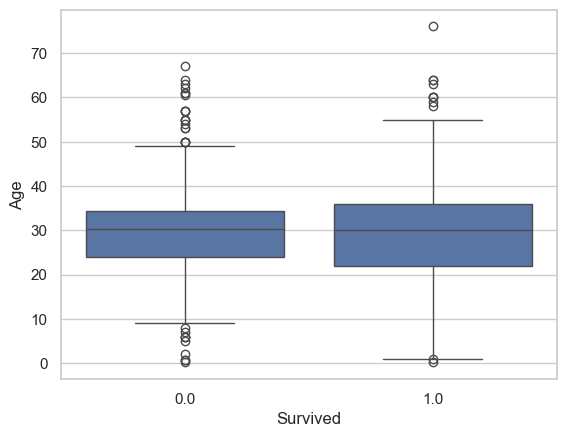

In [246]:
sns.boxplot(x= 'Survived', y= 'Age', data= df)

#### 4.3 Multivariate Analysis (Multiple Features Together)

#### 4.3.1 Heatmap to visualize correlations (sns.heatmap(df.corr(), annot=True)).

<Axes: >

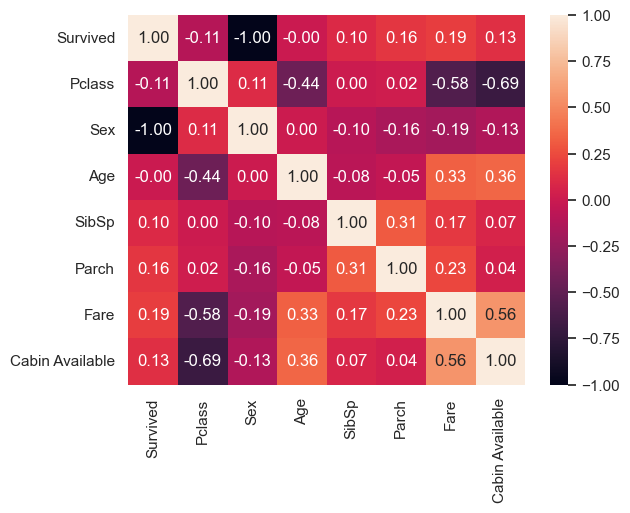

In [ ]:
df_num = df.select_dtypes(include=["number"])
sns.heatmap(df_num.corr(), annot=True, fmt=".2f")

#### 4.3.2 Pairplot (sns.pairplot(df, hue='Survived')) to see feature relationships.

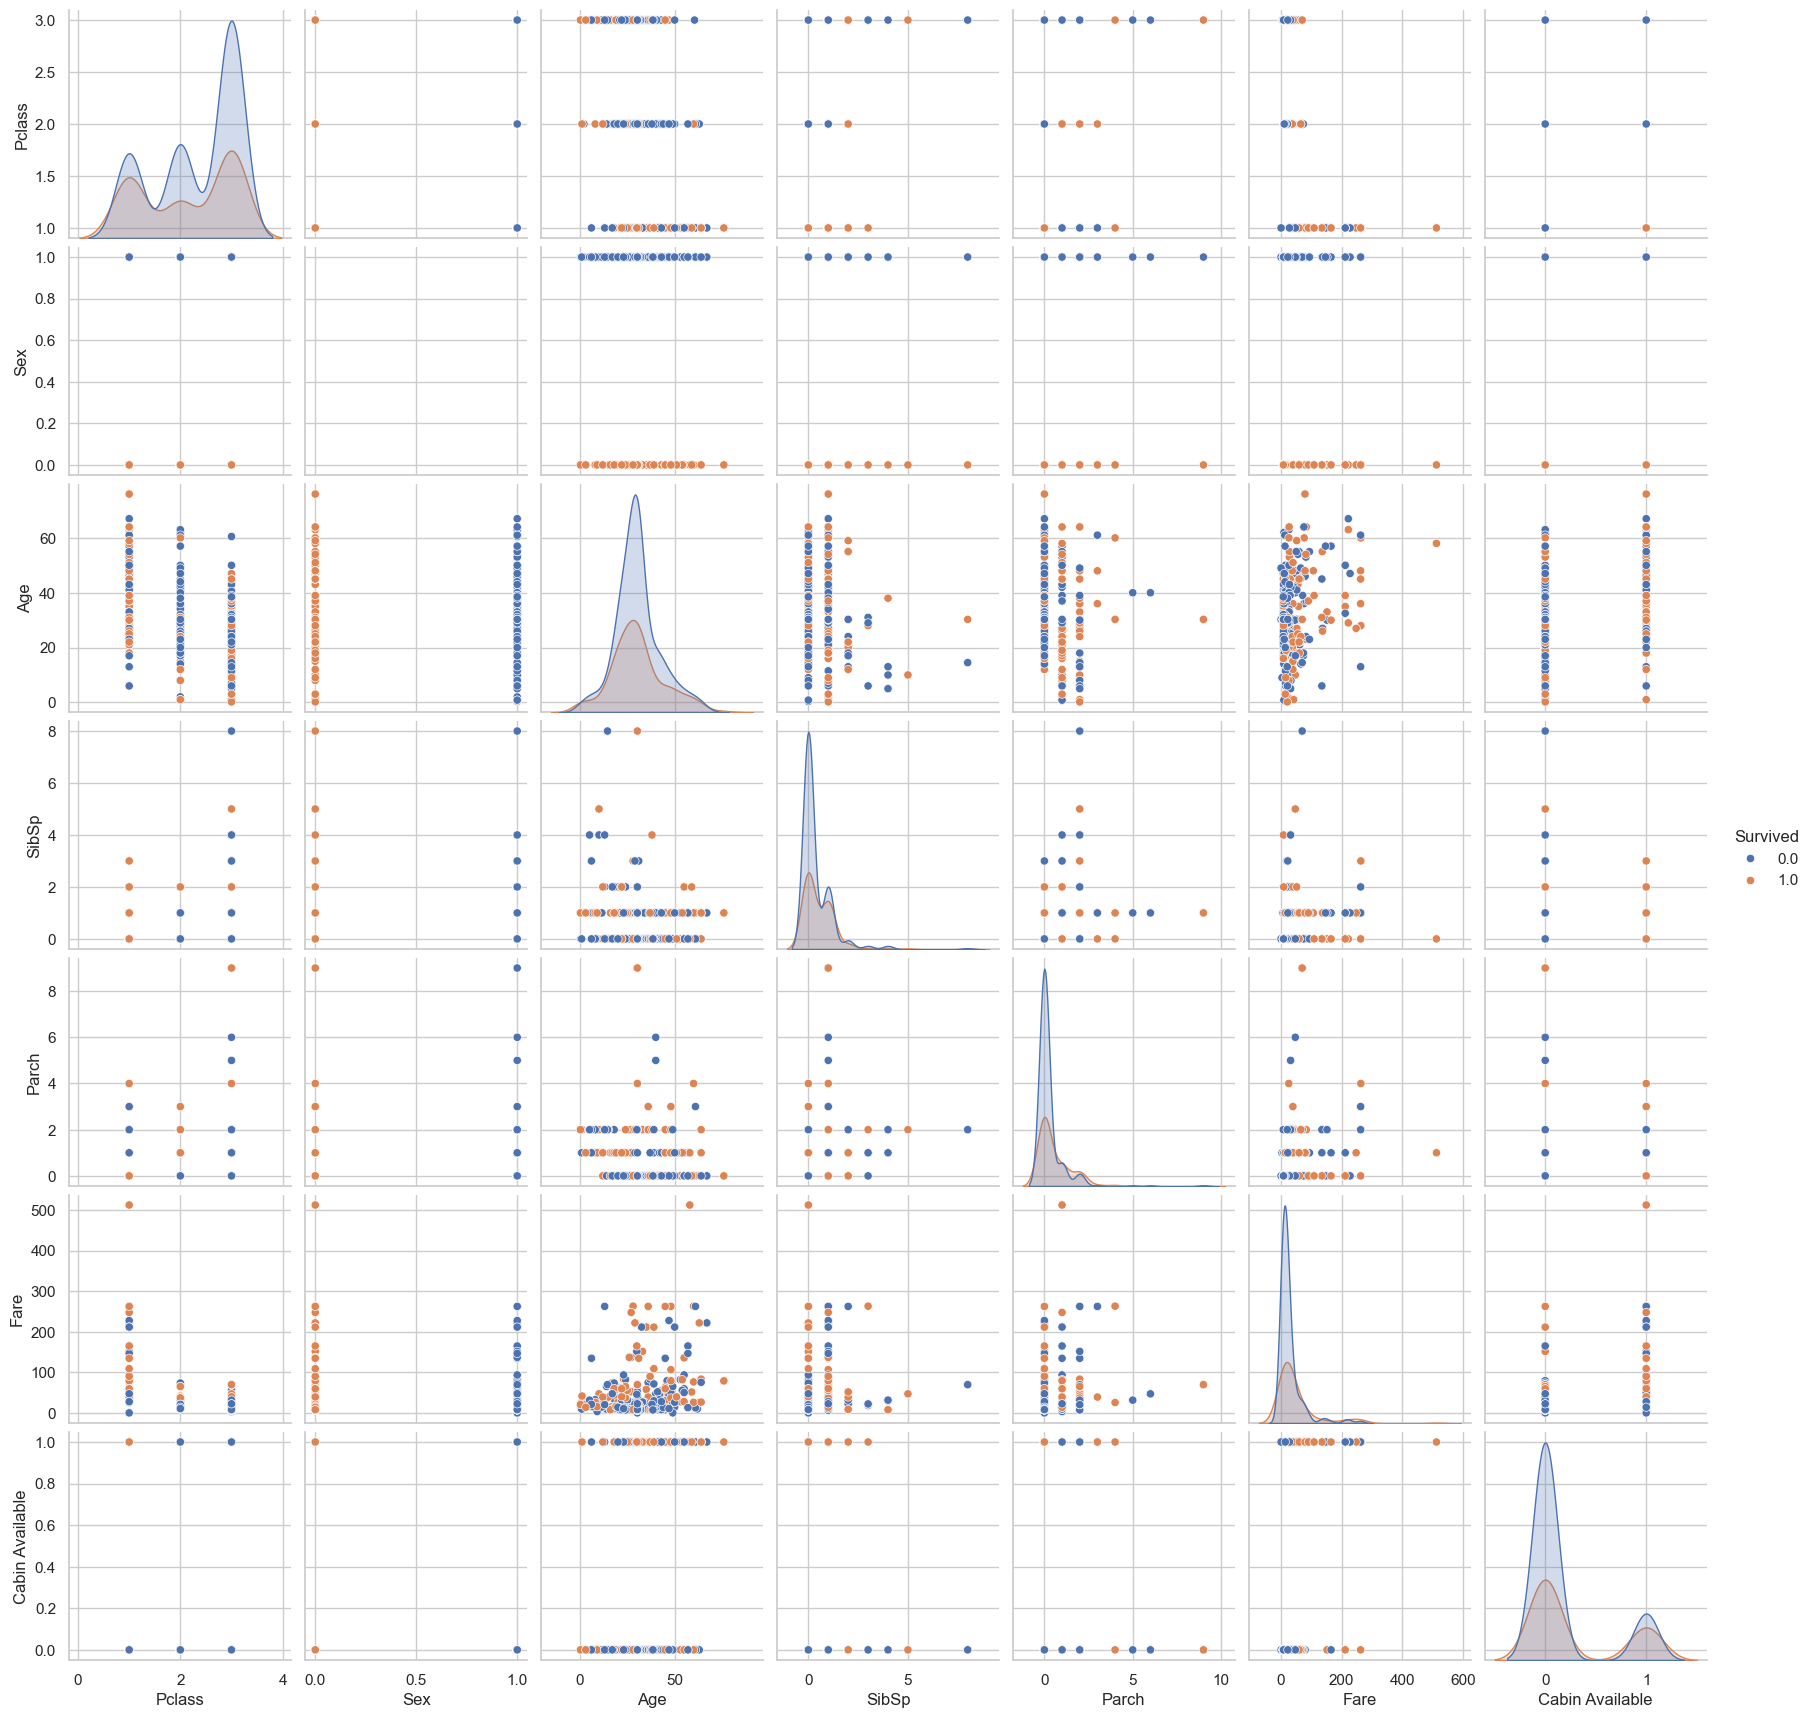

In [261]:
sns.pairplot(df,hue='Survived')

#### 4.3.3 Groupby analysis (df.groupby(['Pclass', 'Sex'])['Survived'].mean())

In [269]:
df.groupby(['Pclass','Sex'])['Survived'].mean()


Pclass  Sex
1       0.0    1.0
        1.0    0.0
2       0.0    1.0
        1.0    0.0
3       0.0    1.0
        1.0    0.0
Name: Survived, dtype: float64

### 5. Feature Engineering (Creating New Features)

In [274]:
df = pd.read_csv('TitanicDataset.csv')

#### 5.1 Create FamilySize feature (FamilySize = SibSp + Parch + 1).

In [275]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


#### 5.2 Extract Title from Name (Mr, Mrs, Miss, etc.).

In [277]:
df["Title"] = df["Name"].str.extract(r' ([A-Za-z]+)\.')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Mr


#### 5.3 Categorize Age into groups (Child, Teen, Adult, Senior).

In [279]:
def AgeGrp(age):
    if age < 13:
        return "Child"
    elif 13 <= age < 18:
        return "Teen"
    elif 18 <= age < 60:
        return "Adult"
    else:
        return "Senior"

df['AgeGroup'] = df['Age'].apply(AgeGrp)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeGroup
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr,Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr,Senior
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr,Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Mr,Senior
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona,Adult
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr,Adult
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Mr,Senior


#### 5.4 Add a Cabin Available feature (1 if Cabin is present, else 0)

In [281]:
df["CabinAvailable"] = df["Cabin"].notna().astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeGroup,CabinAvailable
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr,Adult,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs,Adult,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr,Senior,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr,Adult,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Mr,Senior,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona,Adult,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr,Adult,0
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Mr,Senior,0


### 6. Outlier Detection & Handling

#### 6.1 Detect outliers in Fare and Age using boxplots

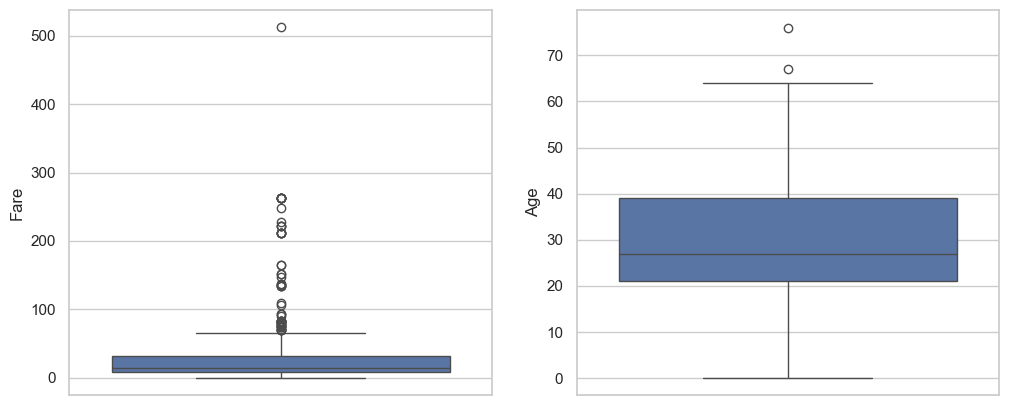

In [296]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Fare"])

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Age"])

plt.show()


In [306]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from Fare and Age
df = remove_outliers(df, "Fare")
df = remove_outliers(df, "Age")


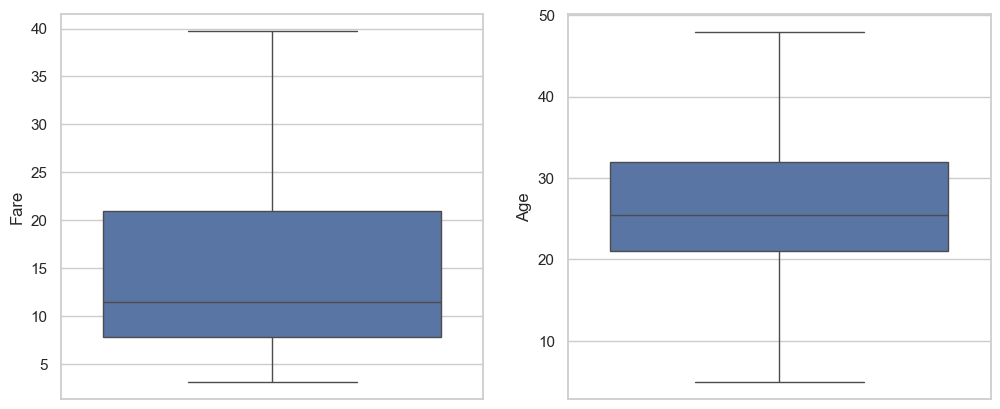

In [307]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Fare"])

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Age"])

plt.show()

#### 6.2 Apply log transformation to Fare to reduce skewness.


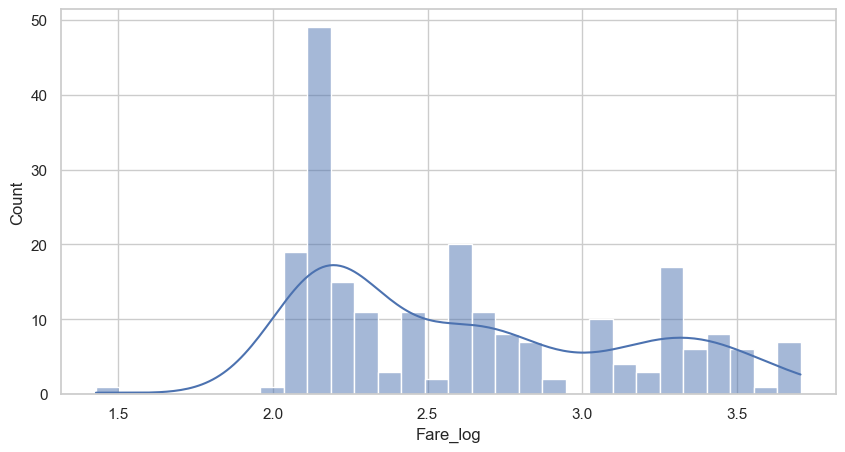

In [311]:
import numpy as np

df["Fare_log"] = np.log1p(df["Fare"])  # log1p avoids log(0) issues

plt.figure(figsize=(10, 5))
sns.histplot(df["Fare_log"], bins=30, kde=True)
plt.show()
